## 4b. Model training in RF in dataset WITH Unknown

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
df_model_keep_unknown = pd.read_csv("df_model_keep_unknown.csv")
df_model_keep_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        875 non-null    float64
 1   Passenger_Count         875 non-null    float64
 2   Base_Fare               875 non-null    float64
 3   Per_Km_Rate             875 non-null    float64
 4   Per_Minute_Rate         875 non-null    float64
 5   Trip_Duration_Minutes   875 non-null    float64
 6   Trip_Price              875 non-null    float64
 7   IsBusinessHour          875 non-null    int64  
 8   IsRain                  875 non-null    int64  
 9   IsSnow                  875 non-null    int64  
 10  IsWeatherUnknown        875 non-null    int64  
 11  IsWeekend               875 non-null    int64  
 12  IsDayUnknown            875 non-null    int64  
 13  Traffic_Conditions_Num  875 non-null    int64  
 14  Time_of_Day_Num         875 non-null    in

### Split

In [29]:
# Features / target
X, y = df_model_keep_unknown.drop(columns=["Trip_Price"]), df_model_keep_unknown["Trip_Price"].astype(float)

### Train test split

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [31]:
# train/test on 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# train RF
rf = RandomForestRegressor(
    n_estimators=400, 
    random_state=42, 
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,400
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate

In [35]:
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print({"mae": mae, "rmse": rmse, "r2": r2})

{'mae': 4.922510937142862, 'rmse': 7.019305428428339, 'r2': 0.9181646415564976}


In [ ]:
# with Trip_Price as target the aim is to find which features, and combinations of, result
# in highest fare


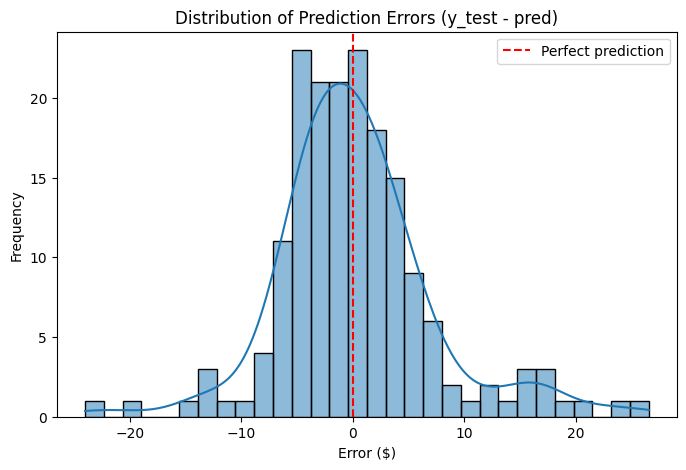

In [36]:
# histogram of error distribution
import matplotlib.pyplot as plt

errors = y_test - pred   # positive = model underpredicted, negative = overpredicted

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", label="Perfect prediction")
plt.title("Distribution of Prediction Errors (y_test - pred)")
plt.xlabel("Error ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

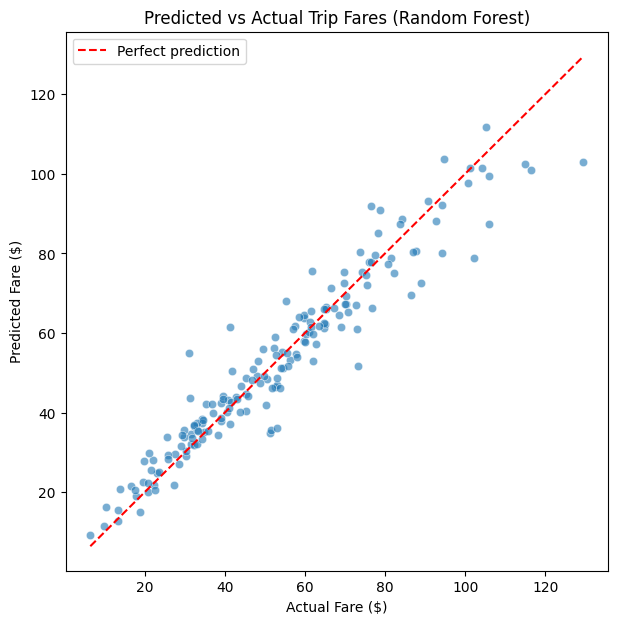

In [37]:
# scatterplot
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Predicted vs Actual Trip Fares (Random Forest)")
plt.legend()
plt.show()

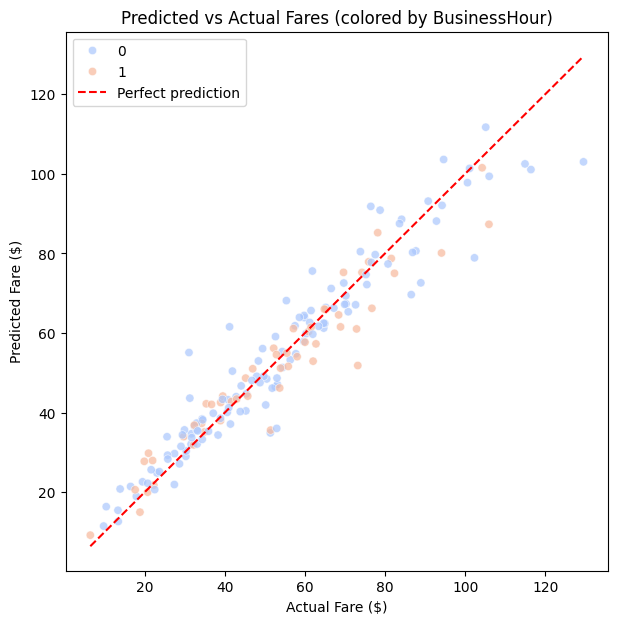

In [38]:
# plot to check errors on smart features
# IsBusinesshour:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x=y_test, y=pred, 
    hue=X_test["IsBusinessHour"],  # color points by BusinessHour flag
    palette="coolwarm", alpha=0.7
)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Predicted vs Actual Fares (colored by BusinessHour)")
plt.legend()
plt.show()

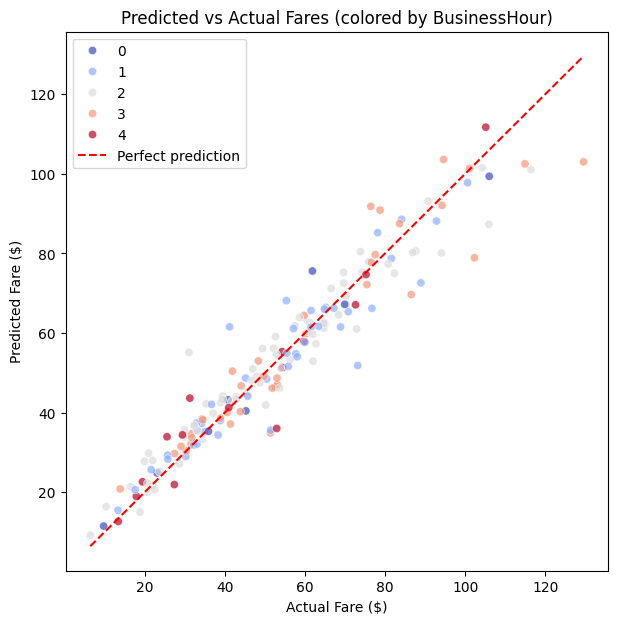

In [41]:
# plot to check errors on smart features
# IsRain:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x=y_test, y=pred, 
    hue=X_test["Time_of_Day_Num"],  # color points by BusinessHour flag
    palette="coolwarm", alpha=0.7
)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Predicted vs Actual Fares (colored by BusinessHour)")
plt.legend()
plt.show()

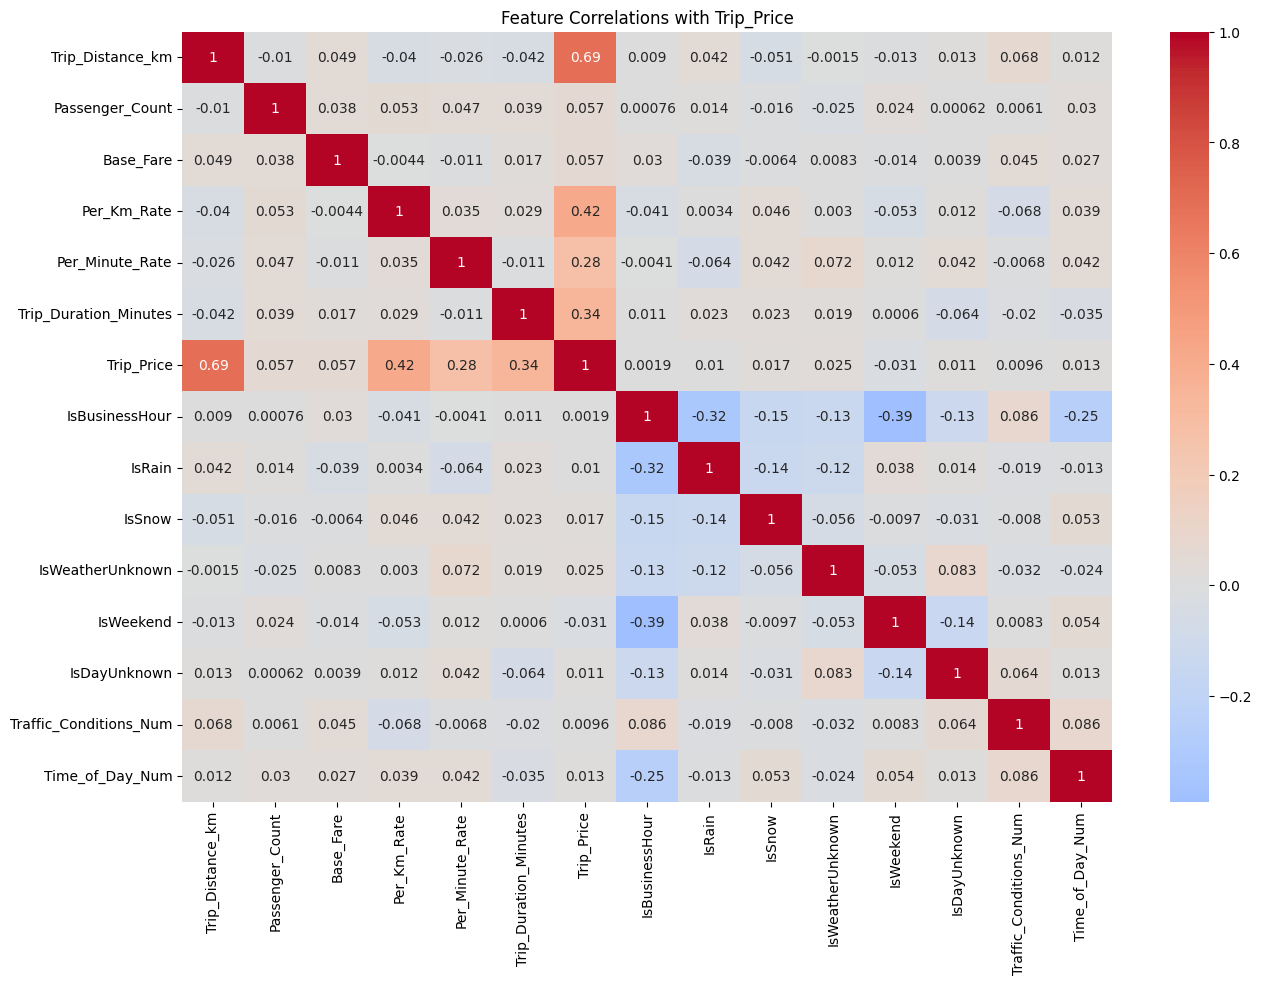

In [43]:
# heatmap for feature correlations
plt.figure(figsize=(15,10))
corr = df_model_keep_unknown.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlations with Trip_Price")
plt.show()

/var/folders/sl/9m1cmg1d6y58tgz5_s_fdgsc0000gn/T/ipykernel_18621/1180904451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


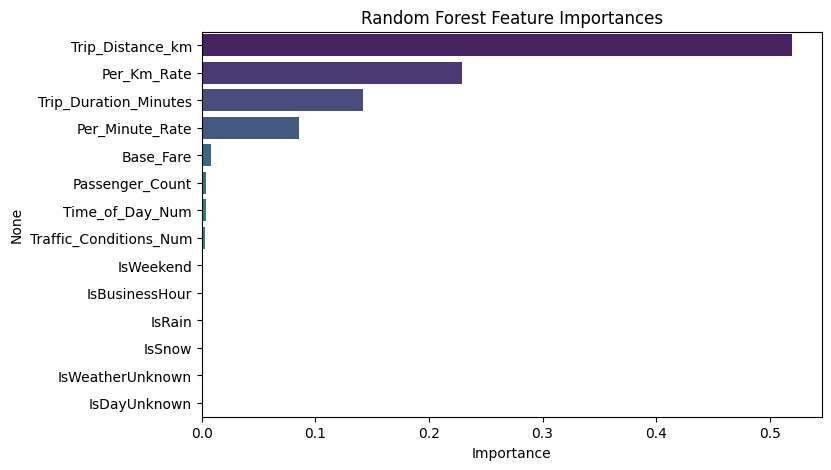

In [45]:
# feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()